# Assignment- Customer Churn Prediction

In [110]:
# Basic Python modules
import os
import gc
import random
import math
import pprint

# Data manipulation and linear algebra
import numpy
import os
import gc
import random
import math
import pprint

# Data manipulation and linear algebra
import numpy as np
import pandas as pd



In [111]:
dataframe_churn = pd.read_csv("customer-churn.csv")
dataframe_churn.head()

,customerID,gender,tenure,PhoneService,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,1,No,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,34,Yes,DSL,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,2,Yes,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,45,No,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,2,Yes,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
printmd(f"Dataset Dimension: **{dataframe_churn.shape[0]}** rows,  **{dataframe_churn.shape[1]}** columns")

Dataset Dimension: **7043** rows,  **12** columns

In [113]:
dataframe_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   InternetService   7043 non-null   object 
 5   TechSupport       7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 660.4+ KB


In [114]:
#Checking Duplicates
print('Known observations: {}\nUnique observations: {}'.format(len(dataframe_churn.index),len(dataframe_churn.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 7043
Unique observations: 7043


**No duplicates Found!**

In [119]:
dataframe_churn.describe(include=['object']).T   #Categorical Features


,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
PhoneService,7043,2,Yes,6361
InternetService,7043,3,Fiber optic,3096
TechSupport,7043,3,No,3473
Contract,7043,3,Month-to-month,3875
PaperlessBilling,7043,2,Yes,4171
PaymentMethod,7043,4,Electronic check,2365
TotalCharges,7043,6531,,11
Churn,7043,2,No,5174


In [121]:
dataframe_churn.isna().sum()


customerID          0
gender              0
tenure              0
PhoneService        0
InternetService     0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [122]:
display(dataframe_churn[dataframe_churn.tenure == 1].head(2))

printmd("<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**")

,customerID,gender,tenure,PhoneService,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,1,No,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,DSL,No,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**

In [123]:
display(dataframe_churn[dataframe_churn.tenure == 3].head(2))

printmd("<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**")
printmd("<br>From the above obs']].describe().Tervation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**")
printmd("**Therefore, imputing missing values on 'TotalCharges' column with 0**")

,customerID,gender,tenure,PhoneService,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,5122-CYFXA,Female,3,Yes,DSL,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,5630-AHZIL,Female,3,Yes,DSL,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**

<br>From the above obs']].describe().Tervation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**

**Therefore, imputing missing values on 'TotalCharges' column with 0**

In [124]:
dataframe_churn[['tenure', 'MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


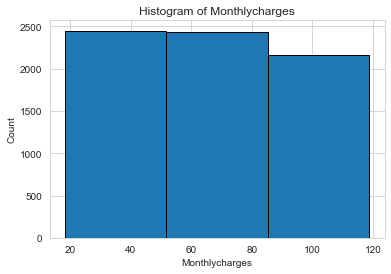

**Value Ranges for Binning**

Bin 1: (18.25 - 51.75)

Bin 2: (51.75 - 85.25)

Bin 3: (85.25 - 118.75)

**First 10 Rows with Binned Monthlycharges**

,MonthlyCharges,MonthlyCharges_binned
0,29.85,Bin_1
1,56.95,Bin_2
2,53.85,Bin_2
3,42.30,Bin_1
4,70.70,Bin_2
5,99.65,Bin_3
6,89.10,Bin_3
7,29.75,Bin_1
8,104.80,Bin_3
9,56.15,Bin_2


**Binning Distribution**

MonthlyCharges_binned
Bin_1    2451
Bin_2    2439
Bin_3    2153
Name: count, dtype: int64

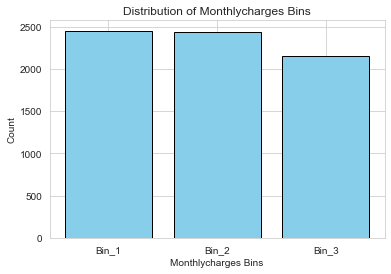

In [125]:
def binning_feature(dataframe_churn, feature, bin_count=3):
    
    # Plot histogram for the original feature
    plt.hist(dataframe_churn[feature], bins=bin_count, edgecolor='k')
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"Histogram of {feature.title()}")
    plt.show()
    
    # Calculate bin edges and display bin ranges
    bins = np.linspace(dataframe_churn[feature].min(), dataframe_churn[feature].max(), bin_count + 1)
    printmd("**Value Ranges for Binning**")
    for i in range(len(bins) - 1):
        printmd(f"Bin {i + 1}: ({bins[i]:.2f} - {bins[i + 1]:.2f})")
    
    # Create bin labels
    bin_labels = [f'Bin_{i+1}' for i in range(bin_count)]
    
    # Bin the feature and add a new column to the DataFrame
    binned_feature = f'{feature}_binned'
    dataframe_churn[binned_feature] = pd.cut(dataframe_churn[feature], bins=bins, labels=bin_labels, include_lowest=True)
    
    # Display the first few rows with the binned feature
    printmd(f"**First 10 Rows with Binned {feature.title()}**")
    display(dataframe_churn[[feature, binned_feature]].head(10))
    
    # Count     Traceback (most recent  the number of entries in each bin
    printmd("**Binning Distribution**")
    display(dataframe_churn[binned_feature].value_counts())
    dataframe_churn
    # Plot the distribudf_churntion of binned feature
    plt.bar(bin_labels, dataframe_churn[binned_feature].value_counts(), color='skyblue', edgecolor='k')
    plt.xlabel(f"{feature.title()} Bins")
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature.title()} Bins")
    plt.show()
dataframe_churn
# Apply the binning function to the 'MonthlyCharges' column
binning_feature(dataframe_churn, 'MonthlyCharges')

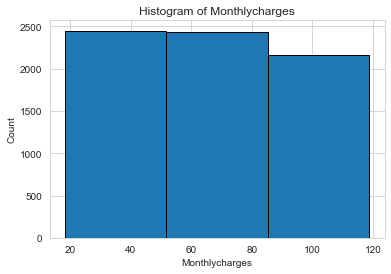

**Value Ranges for Binning**

Bin 1: (18.25 - 51.75)

Bin 2: (51.75 - 85.25)

Bin 3: (85.25 - 118.75)

**First 10 Rows with Binned Monthlycharges**

,MonthlyCharges,MonthlyCharges_binned
0,29.85,Bin_1
1,56.95,Bin_2
2,53.85,Bin_2
3,42.30,Bin_1
4,70.70,Bin_2
5,99.65,Bin_3
6,89.10,Bin_3
7,29.75,Bin_1
8,104.80,Bin_3
9,56.15,Bin_2


**Binning Distribution**

MonthlyCharges_binned
Bin_1    2451
Bin_2    2439
Bin_3    2153
Name: count, dtype: int64

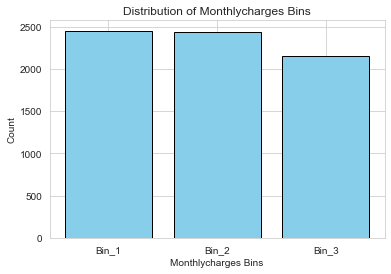

In [126]:
binning_feature(dataframe_churn, 'MonthlyCharges')


In [127]:
printmd("**Data Types**<br>")
dataframe_churn.dtypes.value_counts()

**Data Types**<br>

object      10
int64        1
float64      1
category     1
Name: count, dtype: int64

## Visualization

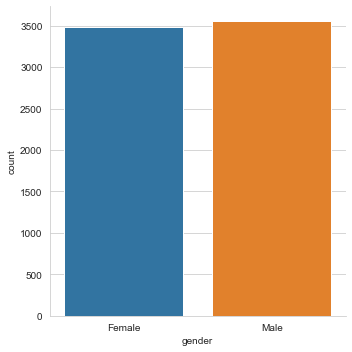

#### Approximately 50/50 gender ratio

In [137]:
sns.catplot(x="gender", kind="count", data=dataframe_churn)
plt.show()

printmd("#### Approximately 50/50 gender ratio")

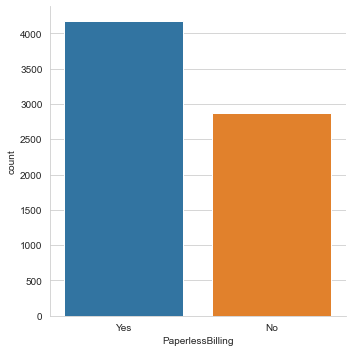

#### Most of the users prefer paperless billing

In [138]:
sns.catplot(x="PaperlessBilling", kind="count", data=dataframe_churn)
plt.show()

printmd("#### Most of the users prefer paperless billing")


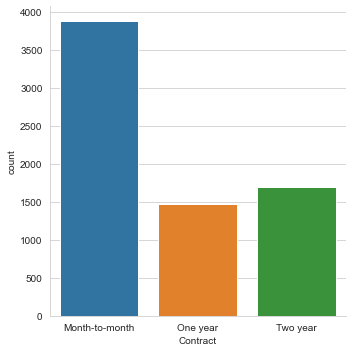

#### Most of the users prefer Month-to-month contract

In [139]:
sns.catplot(x="Contract", kind="count", data=dataframe_churn)
plt.show()

printmd("#### Most of the users prefer Month-to-month contract")

In [140]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=dataframe_churn.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

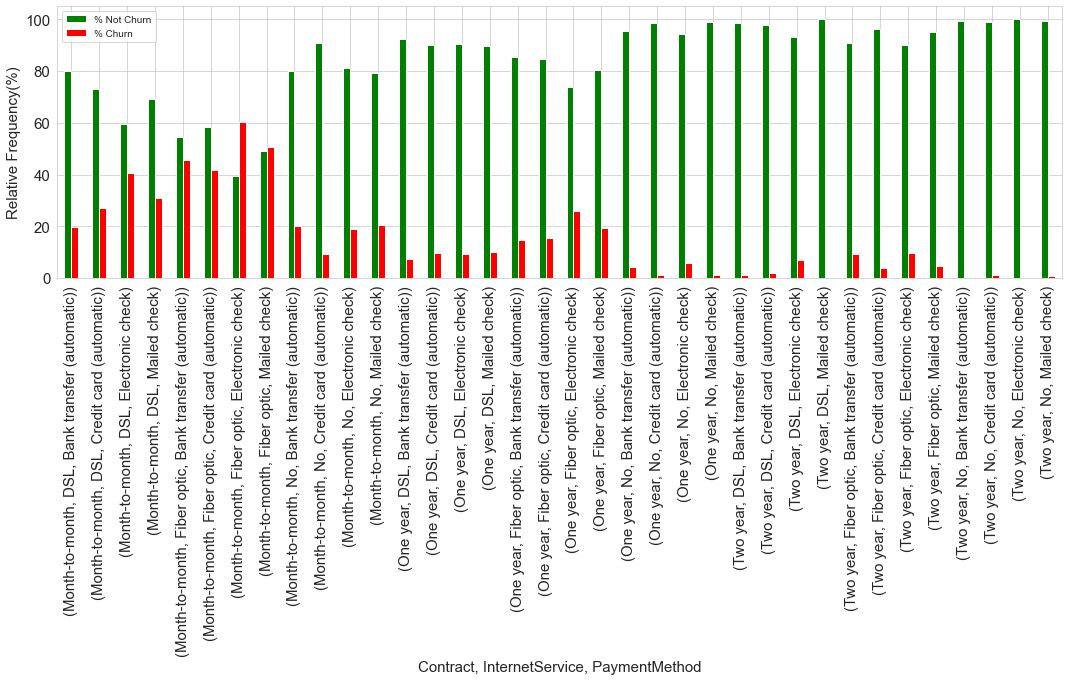

### Findings: Most of the users who churned had a Month-to-month contract and had internet service

In [141]:
multivariate_analysis(dataframe_churn.Contract, dataframe_churn.InternetService, dataframe_churn.PaymentMethod)
printmd("### Findings: Most of the users who churned had a Month-to-month contract and had internet service")

In [176]:
dataframe_churn = dataframe_churn.drop(columns=['customerID'])


In [177]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

binary_columns = ['gender', 'PhoneService', 'TechSupport', 'PaperlessBilling', 'Churn']

for column in binary_columns:
    dataframe_churn[column] = label_encoder.fit_transform(dataframe_churn[column])


In [178]:
dataframe_churn = pd.get_dummies(dataframe_churn, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)


In [179]:
dataframe_churn['TotalCharges'] = pd.to_numeric(dataframe_churn['TotalCharges'], errors='coerce')
dataframe_churn['TotalCharges'].fillna(dataframe_churn['TotalCharges'].median(), inplace=True)


In [180]:
X = dataframe_churn.drop('Churn', axis=1)
y = dataframe_churn['Churn']


In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1379  160]
 [ 249  325]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.67      0.57      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [187]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_y_pred = rf_model.predict(X_test_scaled)

print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))


[[1384  155]
 [ 296  278]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1539
           1       0.64      0.48      0.55       574

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.77      0.79      0.78      2113



In [188]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')


Cross-Validation Scores: [0.78296146 0.79918864 0.77383367 0.78600406 0.77890467]
Mean CV Score: 0.7841784989858012


In [189]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.7953325297077379


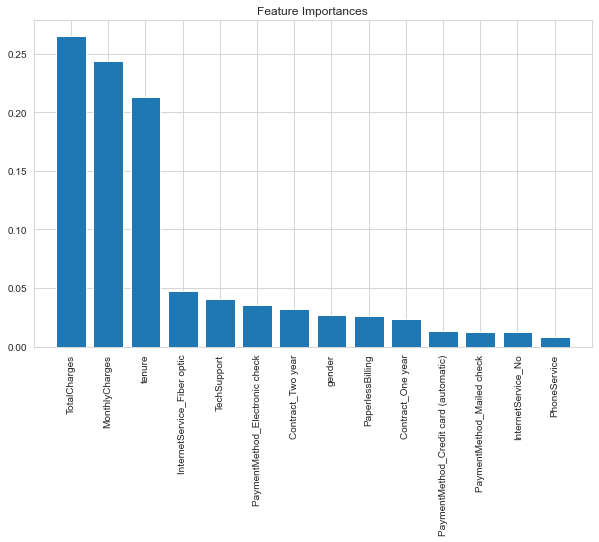

In [190]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


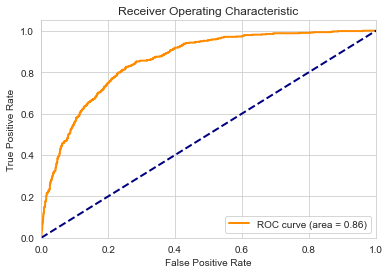

[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END .max_de

In [191]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Thanks for the Opportuniy

### GitHub: 